In [1]:
from keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [11]:
image_size=[224,224]
train_path='Train'
test_path='Test'

In [12]:
vgg19=VGG19(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [13]:
for layer in vgg19.layers:
    layer.trainable=False

In [18]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
folders=glob('Train/*')


In [17]:
folders

['Train\\Parasite', 'Train\\Uninfected']

In [19]:
x=Flatten()(vgg19.output)


In [20]:
prediction=Dense(len(folders),activation='softmax')(x)

In [21]:
model=Model(inputs=vgg19.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(
    rescale=1/255
)

In [37]:
training_set=train_datagen.flow_from_directory('Train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [38]:
training_set

In [39]:
test_set=test_datagen.flow_from_directory('Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [40]:
test_set

In [42]:
r=model.fit(
training_set,validation_data=test_set,
epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 59s 5s/step - loss: 0.5139 - accuracy: 0.7524 - val_loss: 0.5810 - val_accuracy: 0.6642
Epoch 2/10
13/13 [==============================] - 58s 4s/step - loss: 0.3622 - accuracy: 0.8438 - val_loss: 0.4089 - val_accuracy: 0.8209
Epoch 3/10
13/13 [==============================] - 57s 4s/step - loss: 0.3620 - accuracy: 0.8245 - val_loss: 0.7226 - val_accuracy: 0.6343
Epoch 4/10
13/13 [==============================] - 60s 5s/step - loss: 0.3226 - accuracy: 0.8630 - val_loss: 0.3676 - val_accuracy: 0.8284
Epoch 5/10
13/13 [==============================] - 54s 4s/step - loss: 0.2824 - accuracy: 0.8846 - val_loss: 0.4015 - val_accuracy: 0.7985
Epoch 6/10
13/13 [==============================] - 57s 4s/step - loss: 0.2671 - accuracy: 0.8990 - val_loss: 0.3315 - val_accuracy: 0.8358
Epoch 7/10
13/13 [==============================] - 57s 5s/step - loss: 0.2832 - accuracy: 0.8894 - val_loss: 0.3861 - val_accuracy: 0.7761
Epoch 8/10
13/13 [==

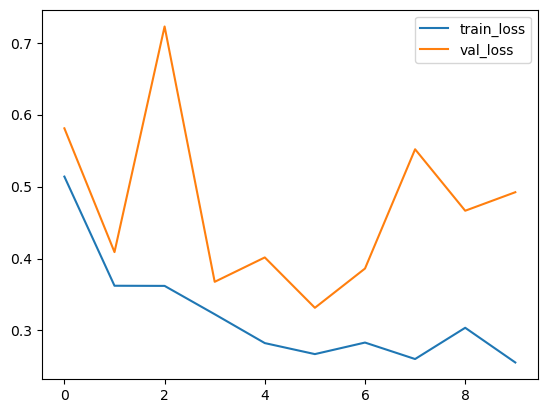

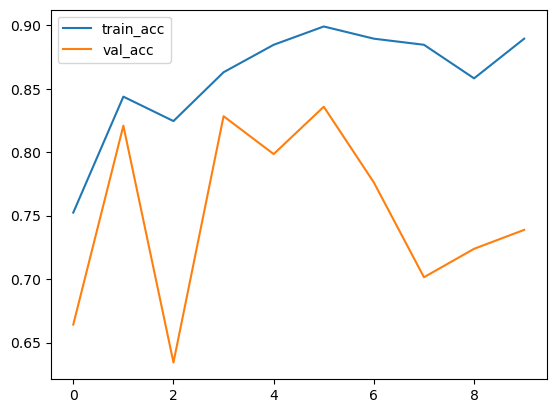

In [47]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [48]:
from keras.models import load_model
model.save('model_vgg19.h5')

In [49]:
y_pred=model.predict(test_set)

5/5 [==============================] - 14s 3s/step


In [50]:
y_pred

array([[6.7169338e-01, 3.2830665e-01],
       [9.7904794e-02, 9.0209526e-01],
       [9.5725417e-01, 4.2745858e-02],
       [4.9985360e-02, 9.5001459e-01],
       [2.6397026e-01, 7.3602980e-01],
       [2.0921133e-01, 7.9078865e-01],
       [8.2973301e-02, 9.1702670e-01],
       [1.2653200e-01, 8.7346792e-01],
       [8.3896942e-02, 9.1610301e-01],
       [4.0085267e-02, 9.5991468e-01],
       [1.5445830e-01, 8.4554166e-01],
       [1.7612575e-01, 8.2387429e-01],
       [6.5959108e-01, 3.4040889e-01],
       [2.1937950e-01, 7.8062052e-01],
       [6.3169634e-01, 3.6830360e-01],
       [9.4689155e-01, 5.3108416e-02],
       [9.9597979e-01, 4.0202131e-03],
       [3.2119207e-02, 9.6788079e-01],
       [2.9102679e-02, 9.7089732e-01],
       [8.8414289e-02, 9.1158575e-01],
       [2.1099962e-01, 7.8900039e-01],
       [9.7375399e-01, 2.6246063e-02],
       [2.7772090e-01, 7.2227901e-01],
       [9.4931352e-01, 5.0686456e-02],
       [1.4261803e-02, 9.8573816e-01],
       [7.8427160e-01, 2.

In [51]:
y_pred=np.argmax(y_pred,axis=1)

In [52]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1], dtype=int64)

In [156]:
img=image.load_img('Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_113.png',target_size=(224,224))

In [157]:
y=image.img_to_array(img)

In [158]:
y=y/255
    

In [159]:
y

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [160]:
y=np.expand_dims(y,axis=0)
img_data=preprocess_input(y)
img_data.shape

(1, 224, 224, 3)

In [161]:
model.predict(img_data)

1/1 [==============================] - 0s 104ms/step


array([[0.08600602, 0.91399395]], dtype=float32)

In [162]:
a=np.argmax(model.predict(img_data),axis=1)
a

1/1 [==============================] - 0s 109ms/step


array([1], dtype=int64)

In [163]:
if(a==1):
    print("uninfected")
if(a==0):
    print("infected")

uninfected
